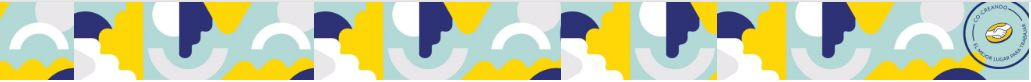

>   
    Fecha               | 12/05/2024
    Realizado por       | Francisco Guzmán
    Objetivo            | solución ejercicio SQL

En el este notebook se leen las bases creadas para dar respuesta a las preguntas realizadas en el ejercicio de **SQL**.

### iniciamos entorno spark

Libreria utilizada para correr **SQL** en colaboratoyy

In [ ]:
!pip install pyspark

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

In [ ]:
#iniciamos
spark = SparkSession.builder.getOrCreate()

### leemos las bases y creamos vistas de "SQL".

In [ ]:
base_ventas = spark.read.csv('/content/drive/MyDrive/challenge/outpus/base_ventas.csv',header=True)
customer_basic = spark.read.csv('/content/drive/MyDrive/challenge/outpus/customer_basic.csv',header=True)

In [ ]:
base_ventas.createOrReplaceTempView("orders")
customer_basic.createOrReplaceTempView("customers")

In [ ]:
spark.sql("SELECT * FROM customers").show()

+----------------+---------+--------------------+----------+-----------+
|          nombre|     sexo|                mail|nacimiento|customer_id|
+----------------+---------+--------------------+----------+-----------+
|      John Lopez|masculino| john_lopez@meli.com|1933-12-31|   01646253|
|   Amanda Thomas|masculino|amanda_thomas@gma...|1948-05-12|   71333627|
|  Victor Burgess| femenino|victor_burgess@ho...|1970-04-10|   86800636|
|     Eugene King|masculino|eugene_king@gmail...|1992-05-12|   76841209|
|      Jose Weber|masculino|jose_weber@hotmai...|2004-05-12|   23372047|
|     Kent Wright| femenino|kent_wright@gmail...|1945-04-07|   73337028|
|   Brian Aguilar| femenino|brian_aguilar@mel...|1973-05-12|   87958531|
|   Frank Jackson| femenino|frank_jackson@mel...|1973-07-23|   68686523|
|     Adam Hansen| femenino|adam_hansen@meli.com|1968-06-06|   99394560|
|   Cynthia Dixon| femenino|cynthia_dixon@gma...|1978-03-07|   22362272|
|  Stephen Morris|masculino|stephen_morris@me...|19

In [ ]:
spark.sql("SELECT * FROM orders").show()

+-----------------+--------------------+--------------------+------+--------+-----------+-----------+----------+
|           orders|       sub_categoria|              modelo|precio|cantidad|fecha_venta|customer_id| categoria|
+-----------------+--------------------+--------------------+------+--------+-----------+-----------+----------+
|ARORDERID88295408|Celulares y Smart...|BlackBerry Bold 9000|  2000|       1| 2020-05-22|   06478835|tecnologia|
|ARORDERID68391015|Celulares y Smart...|  Sony Ericsson T68i|  6500|       1| 2020-04-21|   81582528|tecnologia|
|ARORDERID37663754|Celulares y Smart...|    BlackBerry Curve|  2000|       3| 2020-10-18|   76841209|tecnologia|
|ARORDERID74462544|Celulares y Smart...|    Motorola DynaTAC|   880|       2| 2020-06-22|   76841209|tecnologia|
|ARORDERID81244268|Celulares y Smart...|              iPhone|  6000|       4| 2020-09-30|   78701852|tecnologia|
|ARORDERID28463438|Celulares y Smart...|    Samsung Galaxy S|  6500|       1| 2020-02-28|   8795

## casos planteados


Un usuario ingresa al sitio de Mercado Libre para comprar **dos** dispositivos móviles **iguales**.

Realiza la búsqueda navegando por la categorías Tecnología > Celulares y Teléfonos > **Celulares y Smartphones**, y finalmente encuentra el producto que necesita comprar.

**Procede con la compra** del mismo seleccionado **dos unidades**, el cual genera una orden de compra.

In [ ]:
#Se procede a filtar la data de acuerdo al requerimiento y se crea un universo con datos de ordenes y clientes

spark.sql("SELECT orders.customer_id,nombre,nacimiento,mail,orders,fecha_venta,categoria,sub_categoria,modelo,precio,cantidad \
          FROM orders \
          LEFT JOIN customers ON orders.customer_id = customers.customer_id").createOrReplaceTempView("universo")
spark.sql("SELECT * FROM universo").show(10)

+-----------+--------------+----------+--------------------+-----------------+-----------+----------+--------------------+--------------------+------+--------+
|customer_id|        nombre|nacimiento|                mail|           orders|fecha_venta| categoria|       sub_categoria|              modelo|precio|cantidad|
+-----------+--------------+----------+--------------------+-----------------+-----------+----------+--------------------+--------------------+------+--------+
|   06478835|Tammy Robinson|1994-05-02|tammy_robinson@ho...|ARORDERID88295408| 2020-05-22|tecnologia|Celulares y Smart...|BlackBerry Bold 9000|  2000|       1|
|   81582528|Samantha Avila|1937-01-21|samantha_avila@ho...|ARORDERID68391015| 2020-04-21|tecnologia|Celulares y Smart...|  Sony Ericsson T68i|  6500|       1|
|   76841209|   Eugene King|1992-05-12|eugene_king@gmail...|ARORDERID37663754| 2020-10-18|tecnologia|Celulares y Smart...|    BlackBerry Curve|  2000|       3|
|   76841209|   Eugene King|1992-05-12|e

## Requerimiento del challenge:


Flujo de Compras

- Un usuario ingresa al sitio de Mercado Libre para comprar dos dispositivos móviles iguales.

- Realiza la búsqueda navegando por la categorías Tecnología > Celulares y Teléfonos > Celulares y Smartphones, y finalmente encuentra el producto que necesita comprar.

- Procede con la compra del mismo seleccionado **dos unidades**, el cual genera una orden de compra.

## A resolver:

1. Listar los usuarios que **cumplan años** el día de hoy cuya cantidad de ventas realizadas en **enero 2020** sea superior a **1500**.

**Respuesta:**

Suponiendo que hoy es 12 de mayo, teniendo en cuenta lo mencionado en el **flujo de compras** y en **la pregunta**, se evidencia que:

 Tenemos un vendedor que:
 - **Cumple año** en la fecha indicada
 - La sumatoria de sus ventas de **enero 2020** representa mas de **1500**
 - Sigue el patron de **comprar 2 unidades**.

In [ ]:
 spark.sql("SELECT customer_id, nombre,nacimiento, mail,CONCAT('0',MONTH(fecha_venta),'-',YEAR(fecha_venta)) AS periodo_venta,cantidad AS cantidad_articulos, SUM(precio * cantidad) AS total_ventas , COUNT(orders) AS cantidad_ventas \
             FROM universo \
             WHERE MONTH(nacimiento) = 5 AND \
                  DAY(nacimiento) = 12 AND \
                  cantidad = 2 AND \
                  fecha_venta >= '2020-01-01' AND \
                  fecha_venta <= '2020-01-31' \
              GROUP BY customer_id, nombre, nacimiento, mail, cantidad_articulos,periodo_venta \
              HAVING total_ventas > 1500").show(truncate =False)

+-----------+-------------+----------+----------------------+-------------+------------------+------------+---------------+
|customer_id|nombre       |nacimiento|mail                  |periodo_venta|cantidad_articulos|total_ventas|cantidad_ventas|
+-----------+-------------+----------+----------------------+-------------+------------------+------------+---------------+
|87958531   |Brian Aguilar|1973-05-12|brian_aguilar@meli.com|01-2020      |2                 |4000.0      |1              |
+-----------+-------------+----------+----------------------+-------------+------------------+------------+---------------+



> El **ùnico** caso correspondiente a **cumpleañero** ventas de **enero 2020** mayor a **1500** y que sigue el **patron de compras** es el caso antes expuesto, el Sr **Brian Aguilar**.

In [ ]:
 #evidencia adicional
 #universo de cumpleañeros, se filtra el universo completo por clientes que cumplen años el 5 de mayo
 spark.sql("SELECT customer_id, nombre, nacimiento, mail, fecha_venta,precio, cantidad, modelo \
             FROM universo \
             WHERE MONTH(nacimiento) = 5 AND \
                  DAY(nacimiento) = 12").show()

+-----------+-------------+----------+--------------------+-----------+------+--------+--------------------+
|customer_id|       nombre|nacimiento|                mail|fecha_venta|precio|cantidad|              modelo|
+-----------+-------------+----------+--------------------+-----------+------+--------+--------------------+
|   76841209|  Eugene King|1992-05-12|eugene_king@gmail...| 2020-10-18|  2000|       3|    BlackBerry Curve|
|   76841209|  Eugene King|1992-05-12|eugene_king@gmail...| 2020-06-22|   880|       2|    Motorola DynaTAC|
|   87958531|Brian Aguilar|1973-05-12|brian_aguilar@mel...| 2020-02-28|  6500|       1|    Samsung Galaxy S|
|   23372047|   Jose Weber|2004-05-12|jose_weber@hotmai...| 2020-12-07|  6500|       2|    BlackBerry Curve|
|   76841209|  Eugene King|1992-05-12|eugene_king@gmail...| 2020-12-16|  9000|       2|          Nokia 1100|
|   76841209|  Eugene King|1992-05-12|eugene_king@gmail...| 2020-04-17|  6500|       1|              iPhone|
|   23372047|   Jos

2. Por cada mes del 2020, se solicita el top 5 de usuarios que más vendieron($) en la categoría Celulares. Se requiere el mes y año de análisis, nombre y apellido del vendedor, cantidad de ventas realizadas, cantidad de productos vendidos y el monto total transaccionado.

**Respuesta:**

In [ ]:
spark.sql("SELECT customer_id, nombre, mes, year,mail, cantidad_ventas, articulos_vendidos, ventas_monetario \
          FROM (SELECT customer_id, nombre, mes, year,mail, cantidad_ventas, articulos_vendidos, ventas_monetario, \
                           ROW_NUMBER() OVER(PARTITION BY mes, year ORDER BY ventas_monetario DESC) AS rn \
          FROM (SELECT customer_id, nombre, MONTH(fecha_venta) AS mes, YEAR(fecha_venta) AS year,mail, \
                                 COUNT(orders) AS cantidad_ventas, SUM(cantidad) AS articulos_vendidos, \
                                 SUM(precio*cantidad) AS ventas_monetario \
          FROM universo \
          WHERE sub_categoria = 'Celulares y Smartphones' \
          GROUP BY customer_id, nombre, mes, year,mail) AS sales_by_month) AS ranked_sales \
          WHERE rn <= 5 \
          ORDER BY mes, ventas_monetario DESC").show(100, truncate=False)

+-----------+----------------+---+----+----------------------------+---------------+------------------+----------------+
|customer_id|nombre          |mes|year|mail                        |cantidad_ventas|articulos_vendidos|ventas_monetario|
+-----------+----------------+---+----+----------------------------+---------------+------------------+----------------+
|71333627   |Amanda Thomas   |1  |2020|amanda_thomas@gmail.com     |1              |3.0               |27000.0         |
|76841209   |Eugene King     |1  |2020|eugene_king@gmail.com       |1              |4.0               |26000.0         |
|43399340   |Stephen Morris  |1  |2020|stephen_morris@meli.com     |1              |4.0               |12000.0         |
|60519258   |Lisa Walsh      |1  |2020|lisa_walsh@meli.com         |1              |3.0               |9000.0          |
|87958531   |Brian Aguilar   |1  |2020|brian_aguilar@meli.com      |2              |6.0               |7520.0          |
|22362272   |Cynthia Dixon   |2 